# Optimization

In [1]:
from wpaf_opt import *
from gis.gis_handler import GISHandler
import os.path

all_vars = ['x_wec','x_type_wec','x_pen','p_pen','x_env','p_env','p_wec','p_fish_salmon','pos_env', 'gis_handler', 'p_vessel', 'x_disc_pen', 'p_es', 'p_diesel']

# with wave real data
all_vars = all_vars  #+ ['p_wave_vec']
# with wave average data
#all_vars = all_vars  + ['x_wave_ave']

# NOTE: the file paths are personalized. Requires appropriate adjustments 
# when others run the code. 

conditions = {'current [m/s]': os.path.abspath('/Users/takumaosaka/SEA/data2/Surface Current (m-s).tif'),
              'oxygen [mg/l]': os.path.abspath('/Users/takumaosaka/SEA/data2/Surface Oxygen (mg-l).tif'),
              'salinity [PSU]': os.path.abspath('/Users/takumaosaka/SEA/data2/Surface Salinity (PSU).tif'),
              'temperature [°C]': os.path.abspath('/Users/takumaosaka/SEA/data2/Surface Temperature (C).tif'),
              'period [s]': os.path.abspath('/Users/takumaosaka/SEA/data2/Wave Energy Period (s).tif'),
              'height [m]': os.path.abspath('/Users/takumaosaka/SEA/data2/Wave Significant Height (m).tif'),
              'bathymetry [m]': os.path.abspath('/Users/takumaosaka/SEA/data2/Bathymetry (m).tif'),
              #'distance to shore [m]': 'gis/data/Distance to Shore (m).tif',
              'distance to port [m]': os.path.abspath('/Users/takumaosaka/SEA/data2/Distance to Port (m).tif')}

# high fishing is above average, very high is more than one standard deviation above average
conflicts = {'very high fishing traffic': os.path.abspath('/Users/takumaosaka/SEA/data2/Very High Fishing Vessel Traffic.geojson'),
#            'high fishing traffic': 'data/High Fishing Vessel Traffic.geojson',
             'marine protected areas': os.path.abspath('/Users/takumaosaka/SEA/data2/Marine Protected Areas.geojson'),
             'danger zones': os.path.abspath('/Users/takumaosaka/SEA/data2/Danger Zones and Restricted Areas.geojson'),
             'submarine': os.path.abspath('/Users/takumaosaka/SEA/data2/Submarine Transit Lanes.geojson'),
             'torpex': os.path.abspath('/Users/takumaosaka/SEA/data2/Cape Cod TORPEX.geojson'),
             'block island': os.path.abspath('/Users/takumaosaka/SEA/data2/Block Island Renewable Energy Zone.geojson'),
             'ma wind': os.path.abspath('/Users/takumaosaka/SEA/data2/MA Wind Energy Areas.geojson'),
             'wind lease': os.path.abspath('/Users/takumaosaka/SEA/data2/Potential Wind Lease Areas.geojson'),
             'wind planning': os.path.abspath('/Users/takumaosaka/SEA/data2/Wind Planning Areas.geojson'),
             'shipping': os.path.abspath('/Users/takumaosaka/SEA/data2/Shipping Lanes.geojson')}

waters = os.path.abspath('/Users/takumaosaka/SEA/data2/Northeast State and Federal Waters.geojson')

handler = GISHandler(conditions, conflicts, waters)

args = {}
args['handler'] = handler

# ============================================================================ #
#                       Single Objective Optimization                          #
# ============================================================================ #

# Temporarily commented out for efficiency
"""
x_init, p_init, x, res_best, p_best, op_obj = wpaf_opt(all_vars, args)

aqua_init_obj = Aqua_Obj(x_init.nom0, x_init.name, p_init.nom_dict)
aqua_opt_obj = Aqua_Obj(res_best.x, x.name, p_best) 

init_result(aqua_init_obj)
optimize_result(aqua_opt_obj, x.list, x.unit, res_best)
"""

# ============================================================================ #
#                       Multi-Objective Optimization                           #
# ============================================================================ #

res = wpaf_multi_opt(all_vars, args)
print(res)

multi optimization is running ...
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       50 |      4 |             - |             -
     2 |      100 |      6 |  0.0081235218 |         ideal
     3 |      150 |      7 |  0.0118940114 |         ideal
     4 |      200 |      8 |  0.0538431611 |         ideal
     5 |      250 |      7 |  0.0223973024 |         ideal
     6 |      300 |      9 |  0.0096730666 |         ideal
     7 |      350 |     14 |  0.0196370706 |         ideal
     8 |      400 |     14 |  0.0154617743 |         ideal
     9 |      450 |     18 |  0.0046805093 |             f
    10 |      500 |     23 |  0.0082158778 |         ideal
==Out of run_multi_optimization==
multi optimization is running ...
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       50 |      4 |             - |             -


# Plot power

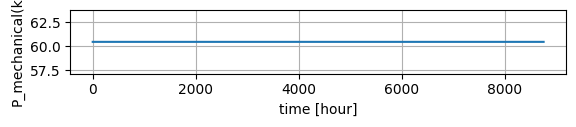

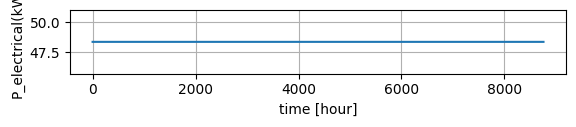

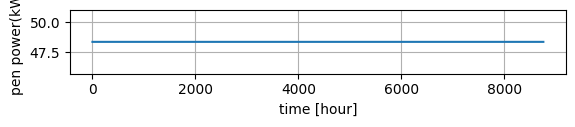

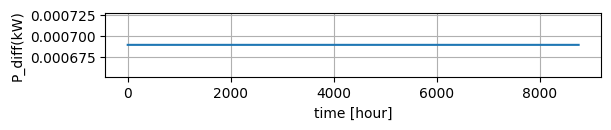

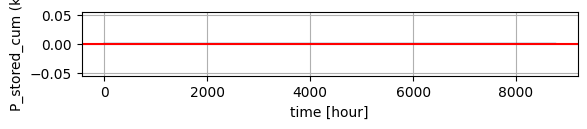

In [3]:
aqua_opt_obj.plot_power()

# Plot fish growth and fish oxygen demand

In [4]:
aqua_opt_obj.plot_variable()

# Plot objective function and constraints

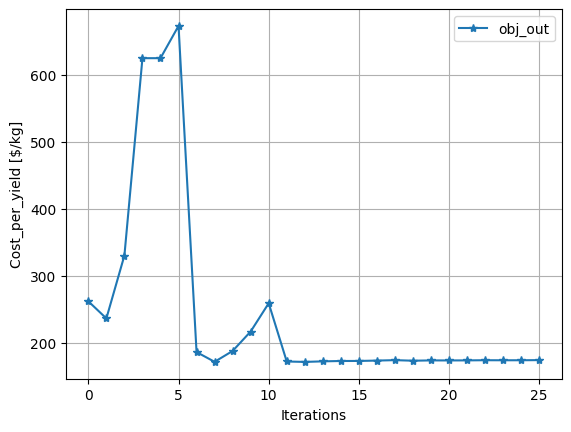

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.plot(op_obj.f, label='obj_out', marker='*')
ax.set(xlabel='Iterations', ylabel='Cost_per_yield [$/kg]')
ax.legend()
ax.grid(True)
plt.show()

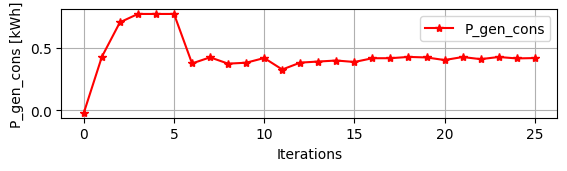

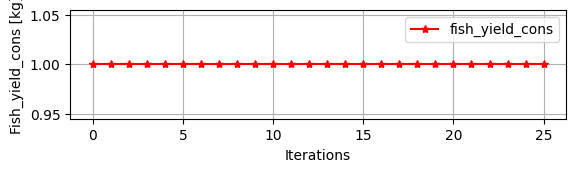

In [6]:
ax1 = plt.subplot(3,1,1)
ax1.plot(op_obj.ineq[:, 0], 'r', label='P_gen_cons', marker='*')
ax1.set(xlabel='Iterations', ylabel='P_gen_cons [kWh]');
ax1.legend()
ax1.grid(True)
plt.show()

ax2 = plt.subplot(3,1,2)
ax2.plot(op_obj.ineq[:, 1], 'r', label='fish_yield_cons', marker='*')
ax2.set(xlabel='Iterations', ylabel='Fish_yield_cons [kg]');
ax2.legend()
ax2.grid(True)
plt.show()
